# __2. Регрессия__

# __Библиотеки и настройки сессии__

### Библиотеки

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

### Настройки сессии

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# __Данные__

Источник: https://www.kaggle.com/vikrishnan/boston-house-prices

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per \$10,000
- PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13.
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in \$1000s

In [8]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.Series(boston.target)
X.head()
y.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [11]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"train size: {y_train.shape[0]}")
print(f"test size: {y_test.shape[0]}")

train size: 404
test size: 102


# __Метрики__

In [48]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean(np.power(y_true - y_pred, 2)))

def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-6)))

def reg_report(y_true, y_pred):
    print(f"RMSE: {RMSE(y_true, y_pred):.1f}")
    print(f"MAPE: {100*MAPE(y_true, y_pred):.0f}%")

# __Модели__

## 1. Линейная регрессия

In [14]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr

In [68]:
fit_intercept = True
normalize = False
positive = False
n_jobs = 2

lr = LinearRegression(fit_intercept=fit_intercept,
                      normalize=normalize,
                      positive=positive,
                      n_jobs=n_jobs
                     ).fit(X_train, y_train)
y_lr = lr.predict(X_test)
reg_report(y_test, y_lr)

RMSE: 5.2
MAPE: 17%


In [63]:
print(f"W: {lr.coef_}")
print(f"bias: {lr.intercept_}")

W: [-1.01125558e-01  4.29100135e-02  3.12148504e-02  2.46316358e+00
 -1.76301529e+01  3.89703700e+00  1.13372820e-02 -1.29995474e+00
  3.49477652e-01 -1.45816094e-02 -1.05087485e+00  9.74653958e-03
 -4.87228924e-01]
bias: 35.86180149727447


## 2. k ближайших соседей

In [15]:
help(KNeighborsRegressor)

Help on class KNeighborsRegressor in module sklearn.neighbors._regression:

class KNeighborsRegressor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.RegressorMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhoo

In [51]:
n_neighbors = 5
weights = "distance"
p = 1
metric = "minkowski"

knn = KNeighborsRegressor(n_neighbors=n_neighbors,
                          weights=weights,
                          p=p,
                          metric=metric,
                          random_state=random_state
                         ).fit(X_train, y_train)
y_knn = knn.predict(X_test)
reg_report(y_test, y_knn)

RMSE: 6.1
MAPE: 18%


## 3. Дерево решений

In [ ]:
help(DecisionTreeRegressor)

In [71]:
criterion = "mse"
max_depth = 3
min_samples_split = 2
min_samples_leaf = 1
random_state = 42

dt = DecisionTreeRegressor(criterion=criterion,
                           max_depth=max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           random_state=random_state
                          ).fit(X_train, y_train)
y_dt = dt.predict(X_test)
reg_report(y_test, y_dt)

RMSE: 4.1
MAPE: 14%


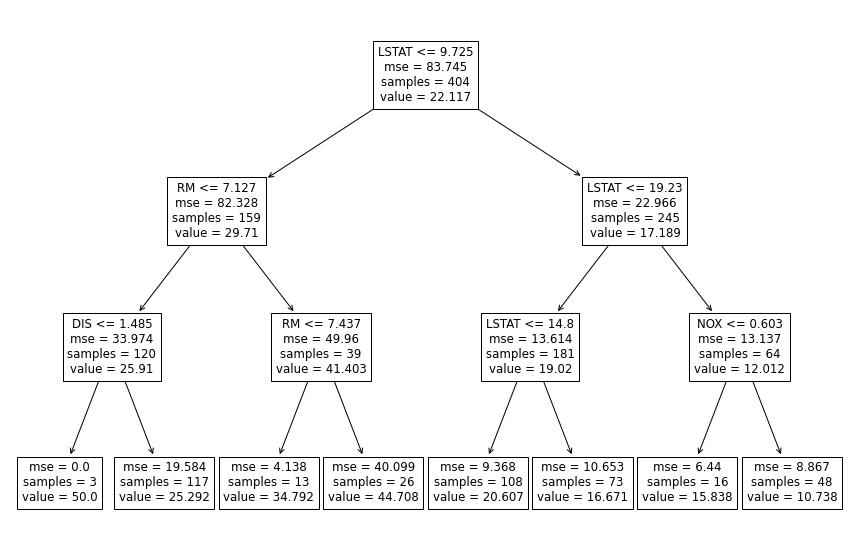

In [29]:
plt.figure(figsize=(15,10))
plot_tree(dt, feature_names=boston.feature_names);

## 4. Случайный лес

In [74]:
n_estimators = 50
criterion = "mse"
max_depth = 3
min_samples_split = 2
min_samples_leaf = 1
n_jobs = 2
random_state = 42

rf = RandomForestRegressor(n_estimators=n_estimators,
                           criterion=criterion,
                           max_depth=max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           n_jobs=n_jobs,
                           random_state=random_state
                          ).fit(X_train, y_train)
y_rf = rf.predict(X_test)
reg_report(y_test, y_rf)

RMSE: 3.9
MAPE: 13%


In [39]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

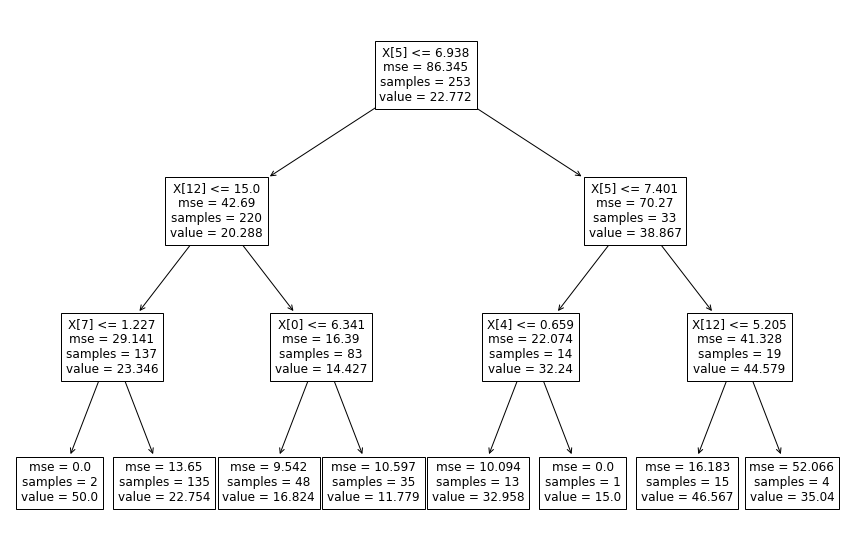

In [38]:
plt.figure(figsize=(15,10))
plot_tree(rf.estimators_[0]);

In [83]:
pd.DataFrame(zip(boston.feature_names, rf.feature_importances_),
             columns=["feature", "importance"])\
        .sort_values(by="importance", ascending=False)

,feature,importance
12,LSTAT,0.520666
5,RM,0.371480
7,DIS,0.046203
0,CRIM,0.035754
10,PTRATIO,0.008575
4,NOX,0.006538
11,B,0.003154
9,TAX,0.002673
6,AGE,0.002377
8,RAD,0.000998


## 5. Градиентный бустинг

In [73]:
n_jobs = 2
random_state = 42

xgb = XGBRegressor(n_jobs=n_jobs,
                   random_state=random_state
                  ).fit(X_train, y_train)
y_xgb = xgb.predict(X_test)
reg_report(y_test, y_xgb)

RMSE: 3.3
MAPE: 11%


In [84]:
pd.DataFrame(zip(boston.feature_names, xgb.feature_importances_),
             columns=["feature", "importance"])\
        .sort_values(by="importance", ascending=False)

,feature,importance
12,LSTAT,0.592276
5,RM,0.172377
10,PTRATIO,0.056134
7,DIS,0.052695
9,TAX,0.029868
4,NOX,0.026923
0,CRIM,0.015658
3,CHAS,0.011609
8,RAD,0.011548
6,AGE,0.010669


# __Практика__

Задача: попробовать ранее описанные модели и разные гиперпараметры. Выйти на MAPE <= 8% на тестовой выборке. Показать какие признаки наиболее важные.

In [ ]:
# <your code>